<a href="https://colab.research.google.com/github/nithinbadi/handwritten-digits-predictor/blob/main/handwritten_digits_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
train_data=datasets.MNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    download=True
)

test_data=datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor(),
    download=True
)

100%|██████████| 9912422/9912422 [00:00<00:00, 118878433.67it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 31480169.91it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 35044142.31it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7124356.31it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [6]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [7]:
train_data.targets.shape

torch.Size([60000])

In [8]:
from torch.utils.data import DataLoader

loaders = {
    'train':DataLoader(train_data,
                       batch_size=100,
                       shuffle=True,
                       num_workers=1),

    'test':DataLoader(test_data,
                       batch_size=100,
                       shuffle=True,
                       num_workers=1)
}

In [9]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7bb7a705faf0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7bb7a705fac0>}

In [10]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv1 = nn.Conv2d(1,10,kernel_size=5)
    self.conv2 = nn.Conv2d(10,20,kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50,10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x),2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
    x = x.view(-1,320) # flatten the layer 20*4*4
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training=self.training)
    x = self.fc2(x)

    return F.softmax(x) # returns probability of all the ten digits


In [11]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.01)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()

  for batch_idx, (data, target) in enumerate(loaders['train']):
    data,target = data.to(device), target.to(device)

    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output,target)


    loss.backward()
    optimizer.step()

    if batch_idx % 20 == 0:
      print(f"Train Epoch: {epoch} [{batch_idx *len(data)}/{len(loaders['train'].dataset)}({100* batch_idx/len(loaders['train']):.0f}%)\t{loss.item():.6f}]")


def test():
  model.eval()
  test_loss = 0
  correct = 0

  with torch.inference_mode():
    for data,target in loaders['test']:
      data,target = data.to(device),target.to(device)

      output = model(data)
      test_loss += loss_fn(output,target).item()
      pred = output.argmax(dim=1, keepdim=True)
      correct +=pred.eq(target.view_as(pred)).sum().item()
  test_loss /= len(loaders['test'].dataset)
  print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loaders['test'].dataset)} ({100. * correct/len(loaders['test'].dataset):.0f})%\n")

In [12]:
for epoch in range(1,11):
  train(epoch)
  test()

<ipython-input-10-aafda727790c>:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x) # returns probability of all the ten digits


Train Epoch: 1 [0/60000(0%)	2.301264]
Train Epoch: 1 [2000/60000(3%)	2.030618]
Train Epoch: 1 [4000/60000(7%)	1.849026]
Train Epoch: 1 [6000/60000(10%)	1.816722]
Train Epoch: 1 [8000/60000(13%)	1.826456]
Train Epoch: 1 [10000/60000(17%)	1.888940]
Train Epoch: 1 [12000/60000(20%)	1.700040]
Train Epoch: 1 [14000/60000(23%)	1.722483]
Train Epoch: 1 [16000/60000(27%)	1.731111]
Train Epoch: 1 [18000/60000(30%)	1.711269]
Train Epoch: 1 [20000/60000(33%)	1.700227]
Train Epoch: 1 [22000/60000(37%)	1.731895]
Train Epoch: 1 [24000/60000(40%)	1.633548]
Train Epoch: 1 [26000/60000(43%)	1.750110]
Train Epoch: 1 [28000/60000(47%)	1.708674]
Train Epoch: 1 [30000/60000(50%)	1.625909]
Train Epoch: 1 [32000/60000(53%)	1.640482]
Train Epoch: 1 [34000/60000(57%)	1.657193]
Train Epoch: 1 [36000/60000(60%)	1.652029]
Train Epoch: 1 [38000/60000(63%)	1.609177]
Train Epoch: 1 [40000/60000(67%)	1.651486]
Train Epoch: 1 [42000/60000(70%)	1.623956]
Train Epoch: 1 [44000/60000(73%)	1.681368]
Train Epoch: 1 [46000/

<ipython-input-10-aafda727790c>:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x) # returns probability of all the ten digits


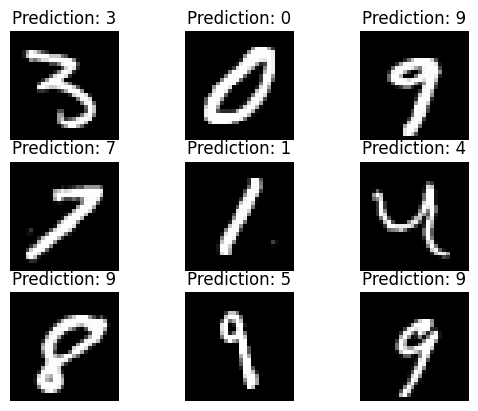

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec





# Create 3x3 subplots
gs = gridspec.GridSpec(3, 3)
fig = plt.figure()
for i in range(9):
  model.eval();
  data,target = test_data[np.random.randint(test_data.data.shape)[0]]

  data = data.unsqueeze(0).to(device)

  output = model(data)

  prediction = output.argmax(dim=1,keepdim=True).item()



  image = data.squeeze(0).squeeze(0).cpu().numpy()

  ax = fig.add_subplot(gs[i]);
  ax.set_title(f"Prediction: {prediction}")
  ax.imshow(image,cmap='gray')
  ax.axis('off')
plt.show();